In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
import statsmodels.api as sm
from sklearn.svm import SVC

# **DATA COLLECTION**

In [ ]:
from google.colab import files
file = files.upload()  #upload file into google colab session

Saving KAG_energydata_complete.csv to KAG_energydata_complete.csv


In [ ]:
df=pd.read_csv("KAG_energydata_complete.csv")
# df.head()
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
X=pd.read_csv("KAG_energydata_complete.csv")

# **PREPROCESSING**

Finding the number of rows and columns

In [ ]:
df.shape

(19735, 29)

Exploring data types and checking for nulls

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

Double checking null values

In [ ]:
df.isnull().sum()

,0
date,0
Appliances,0
lights,0
T1,0
RH_1,0
T2,0
RH_2,0
T3,0
RH_3,0
T4,0


Rough statistics of the data

In [ ]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [ ]:
from sklearn.model_selection import train_test_split

# 75% of the data is usedfor the training of the models and the rest is used for testing
train, test = train_test_split(df,test_size=0.25,random_state=40)

In [ ]:
train.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,...,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,97.835281,3.809202,21.685153,40.271333,20.343487,40.432370,22.268005,39.252994,20.857724,39.041339,...,19.484679,41.567732,7.422035,755.561311,79.744066,4.057009,38.345054,3.768053,25.014452,25.014452
std,102.928289,7.940816,1.605537,3.983201,2.199037,4.081775,1.999986,3.263513,2.040012,4.355528,...,2.010610,4.167305,5.304241,7.398129,14.952250,2.449080,11.785900,4.189370,14.539819,14.539819
min,10.000000,0.000000,16.790000,27.233333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.366667,24.500000,0.000000,1.000000,-6.600000,0.006033,0.006033
25%,50.000000,0.000000,20.745000,37.363333,18.790000,37.900000,20.790000,36.900000,19.533333,35.530000,...,18.000000,38.500000,3.700000,750.983333,70.000000,2.000000,29.000000,0.933333,12.469764,12.469764
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.560000,20.666667,38.400000,...,19.390000,40.900000,6.933333,756.100000,83.833333,3.666667,40.000000,3.450000,24.936900,24.936900
75%,100.000000,0.000000,22.600000,43.090000,21.533333,43.290000,23.290000,41.790000,22.100000,42.193333,...,20.600000,44.363333,10.433333,760.966667,91.666667,5.500000,40.000000,6.566667,37.736202,37.736202
max,1080.000000,60.000000,26.260000,63.360000,29.856667,56.026667,29.200000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.033333,772.300000,100.000000,14.000000,66.000000,15.500000,49.993173,49.993173


In [ ]:
# Divide the columns based on type for clear column management

col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"]
col_light = ["lights"]

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

In [ ]:
# Seperate dependent and independent variables
feature_vars = train[col_temp + col_hum + col_weather + col_light + col_randoms ]
target_vars = train[col_target]

In [ ]:
feature_vars.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,...,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,21.685153,20.343487,22.268005,20.857724,19.589105,7.923834,20.264300,22.028348,19.484679,40.271333,...,41.567732,7.422035,3.768053,79.744066,755.561311,4.057009,38.345054,3.809202,25.014452,25.014452
std,1.605537,2.199037,1.999986,2.040012,1.842916,6.083047,2.105079,1.951399,2.010610,3.983201,...,4.167305,5.304241,4.189370,14.952250,7.398129,2.449080,11.785900,7.940816,14.539819,14.539819
min,16.790000,16.100000,17.200000,15.100000,15.335000,-6.065000,15.390000,16.306667,14.890000,27.233333,...,29.166667,-5.000000,-6.600000,24.500000,729.366667,0.000000,1.000000,0.000000,0.006033,0.006033
25%,20.745000,18.790000,20.790000,19.533333,18.290000,3.663333,18.700000,20.790000,18.000000,37.363333,...,38.500000,3.700000,0.933333,70.000000,750.983333,2.000000,29.000000,0.000000,12.469764,12.469764
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.028571,22.111111,19.390000,39.656667,...,40.900000,6.933333,3.450000,83.833333,756.100000,3.666667,40.000000,0.000000,24.936900,24.936900
75%,22.600000,21.533333,23.290000,22.100000,20.633333,11.293333,21.600000,23.390000,20.600000,43.090000,...,44.363333,10.433333,6.566667,91.666667,760.966667,5.500000,40.000000,0.000000,37.736202,37.736202
max,26.260000,29.856667,29.200000,26.200000,25.745000,28.290000,25.963333,27.230000,24.500000,63.360000,...,53.326667,26.033333,15.500000,100.000000,772.300000,14.000000,66.000000,60.000000,49.993173,49.993173


In [ ]:
# Check the distribution of values in lights column
feature_vars.lights.value_counts()

,count
lights,
0,11438
10,1649
20,1230
30,414
40,64
50,5
60,1


In [ ]:
target_vars.describe()

,Appliances
count,14801.000000
mean,97.835281
std,102.928289
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


In [ ]:
w=24
feature_vars= feature_vars.drop(feature_vars.columns[w], axis=1)

In [ ]:
feature_vars.head(2)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,rv1,rv2
9544,22.6,19.5,21.50,22.89,19.166667,2.863333,21.0,22.89,19.89,34.70,...,38.5,37.26,2.233333,0.4,87.666667,764.200000,1.333333,61.000000,43.195492,43.195492
19366,23.7,21.0,25.39,23.60,19.890000,5.500000,23.0,24.20,22.60,40.29,...,43.4,44.59,6.266667,5.3,93.666667,757.233333,1.000000,25.333333,46.369677,46.369677


In [ ]:
df['date'] = pd.to_datetime(df['date'])

# **DATA EXPLORATION AND VISUALISATION**

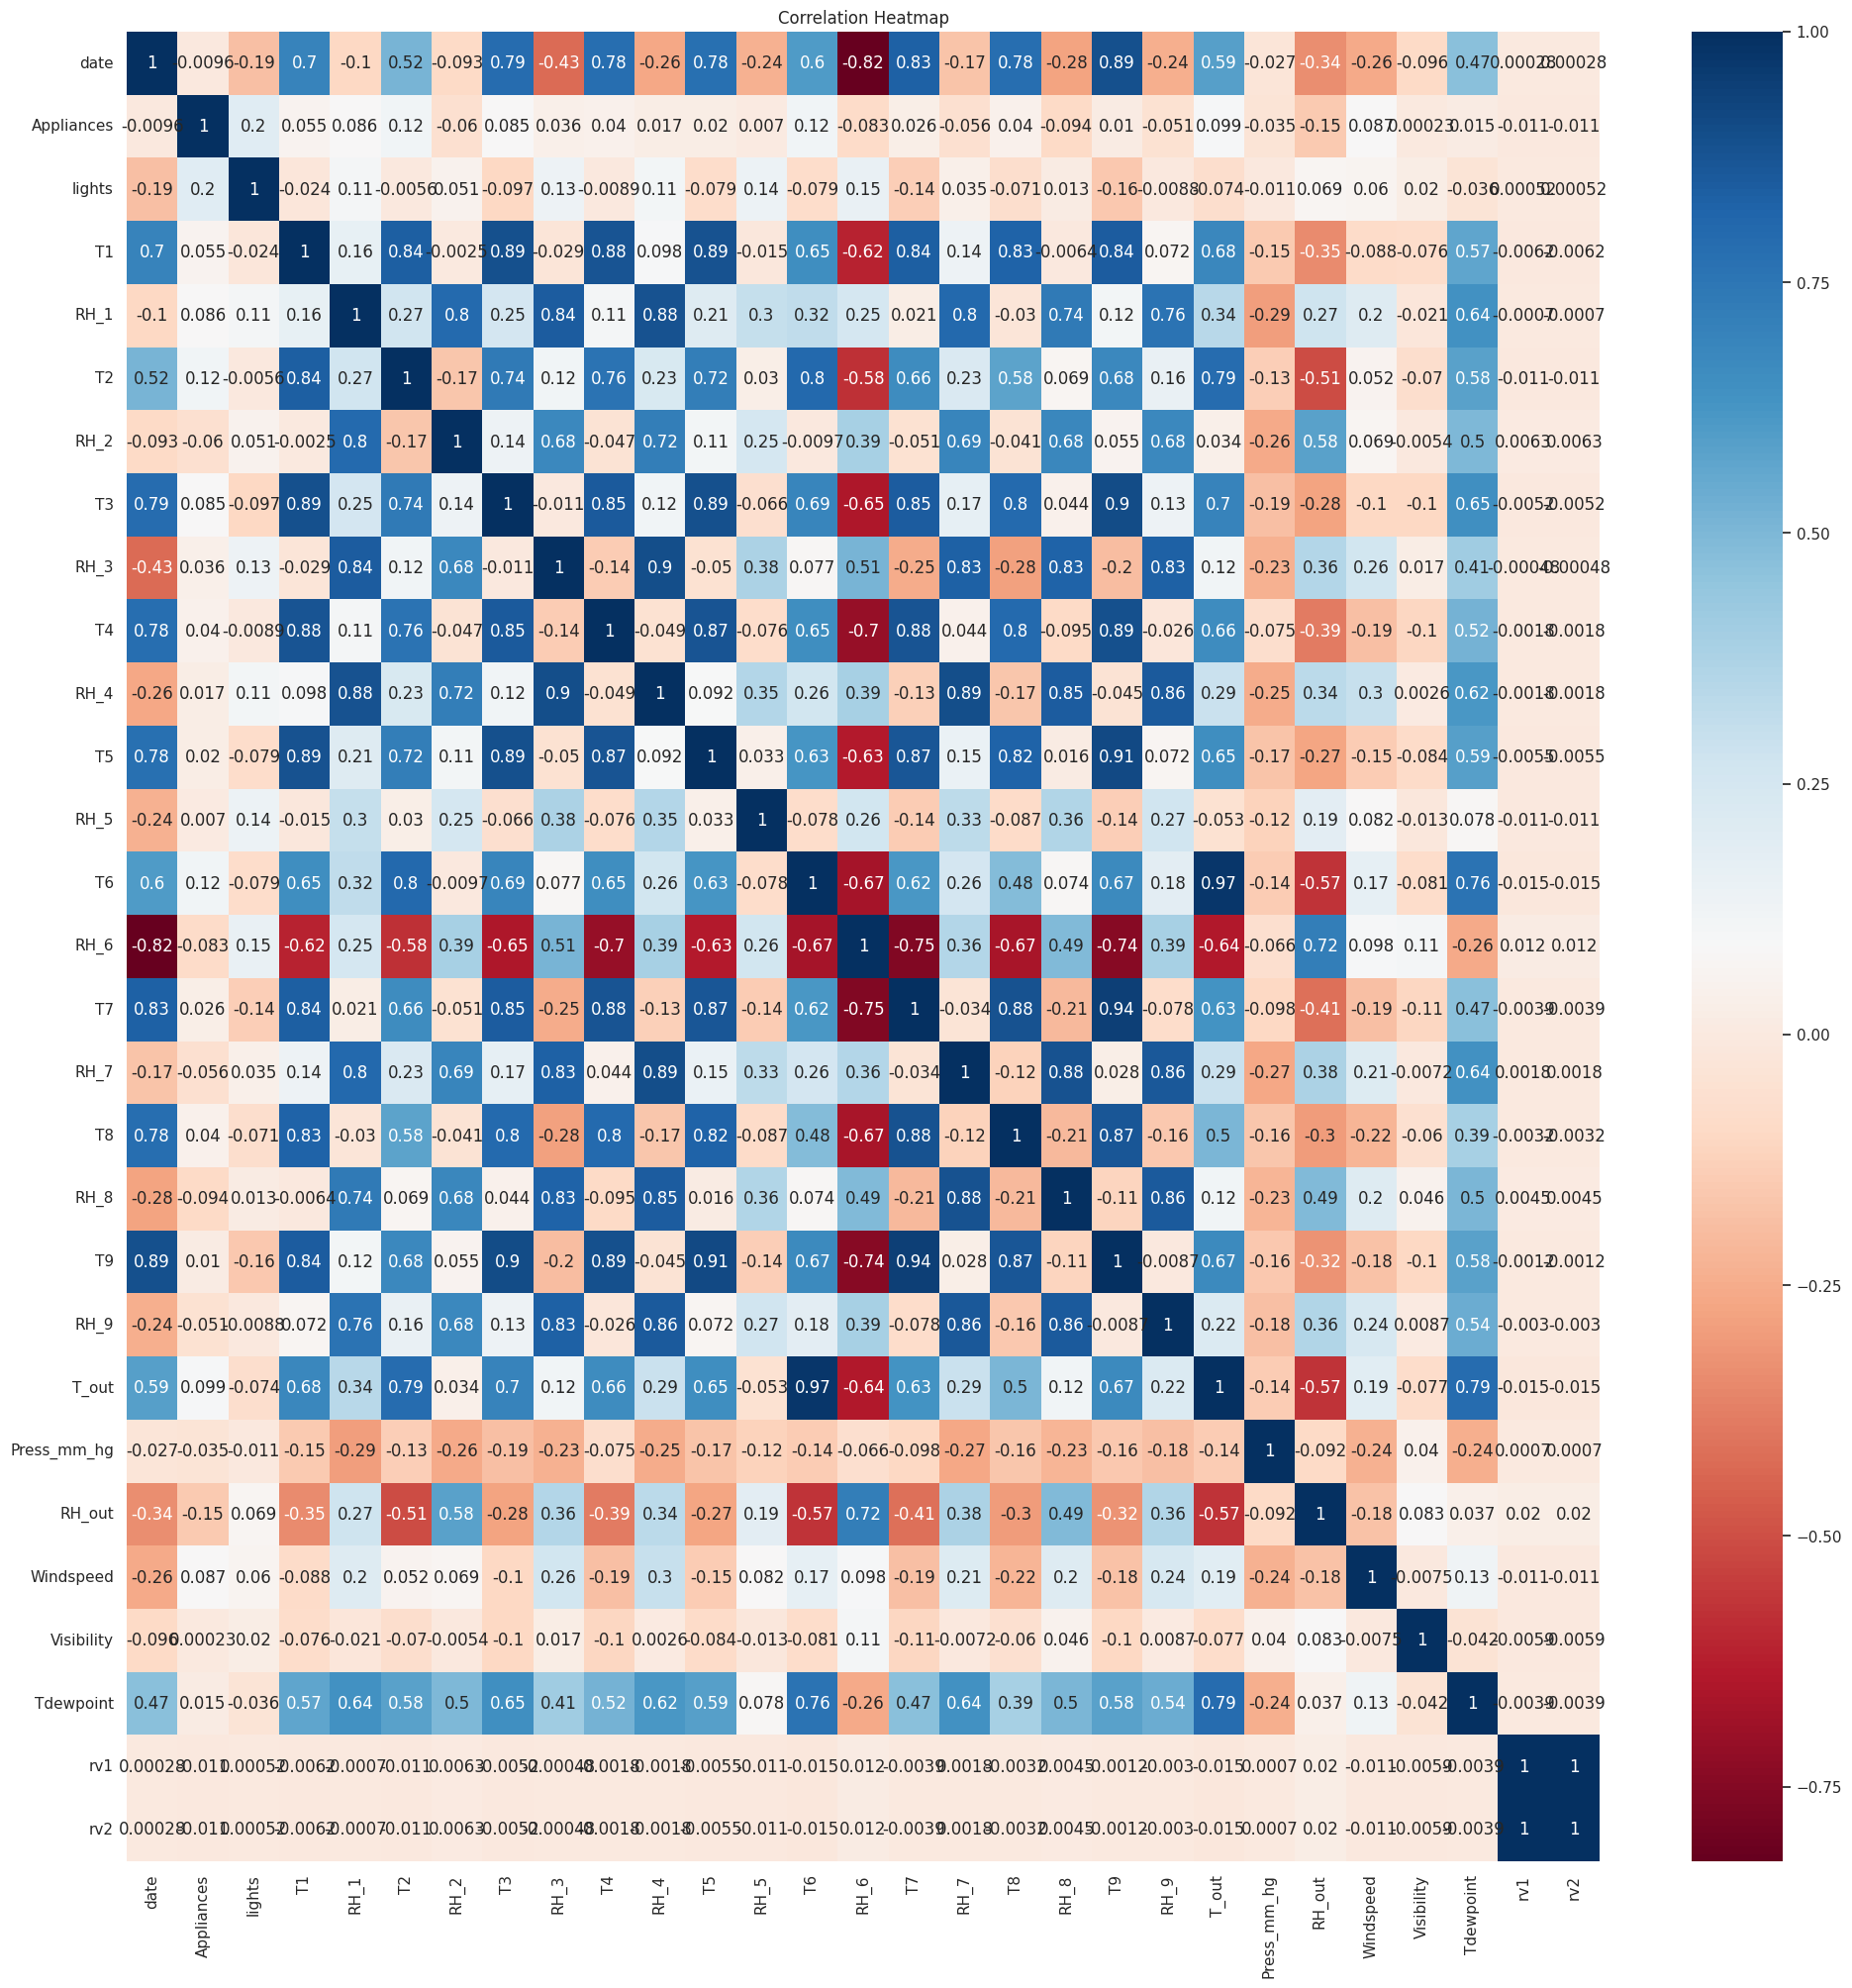

In [ ]:
fig, ax = plt.subplots(figsize=(24,24))
ax = sns.heatmap(df.corr(), annot=True, cmap='RdBu').set(title='Correlation Heatmap')

In [ ]:
# Correlation matrix
corr_matrix = df.corr()

# Find pairs of features with high correlation
high_corr = corr_matrix.abs().unstack().sort_values(ascending=False)

# Only show pairs where correlation > 0.9 (and exclude self-correlation)
high_corr = high_corr[high_corr > 0.8]
high_corr = high_corr[high_corr < 1]
print(high_corr)


T_out  T6       0.974787
T6     T_out    0.974787
T9     T7       0.944776
T7     T9       0.944776
T9     T5       0.911055
                  ...   
RH_6   date     0.824229
T2     T6       0.801186
T6     T2       0.801186
RH_1   RH_7     0.801122
RH_7   RH_1     0.801122
Length: 76, dtype: float64


Observation:

There are columnns which are not needed like T2,T3 and so, and RH_2,RH_3 and so because the correlation is high and it should not be so. So we only include the T1 column and th RH_1 column. The rest of the T and RH columns shall be removed.

In [ ]:
c=[0,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
df_new=df.drop(df.columns[c],axis=1)

The 'lights' and 'Date' columns are also removed as they are not needed for the project.

In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()


df_scaled = scale.fit_transform(df_new)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df_new.columns
df_scaled

,Appliances,T1,RH_1,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,-0.367676,-1.118645,1.843821,-0.152647,-2.976328,0.822080,1.207694,2.091596,0.366975,-0.807974,-0.807974
1,-0.367676,-1.118645,1.616807,-0.174588,-2.962813,0.822080,1.071703,1.766584,0.343135,-0.440240,-0.440240
2,-0.465215,-1.118645,1.517959,-0.196529,-2.949298,0.822080,0.935713,1.441572,0.319294,0.252109,0.252109
3,-0.465215,-1.118645,1.459321,-0.218470,-2.935783,0.822080,0.799723,1.116559,0.295454,1.408801,1.408801
4,-0.367676,-1.118645,1.526336,-0.240411,-2.922268,0.822080,0.663733,0.791547,0.271613,-1.028122,-1.028122
...,...,...,...,...,...,...,...,...,...,...,...
19730,0.022483,2.415962,1.583299,2.881489,-0.043599,-1.616282,-0.288198,-1.243314,2.282163,1.249203,1.249203
19731,-0.075056,2.374452,1.568221,2.856414,-0.043599,-1.593912,-0.220203,-1.172659,2.274216,1.675942,1.675942
19732,1.680659,2.374452,1.592514,2.831338,-0.043599,-1.571542,-0.152208,-1.102004,2.266269,0.290494,0.290494
19733,3.143756,2.374452,1.691361,2.806263,-0.043599,-1.549171,-0.084213,-1.031349,2.258322,-1.287590,-1.287590


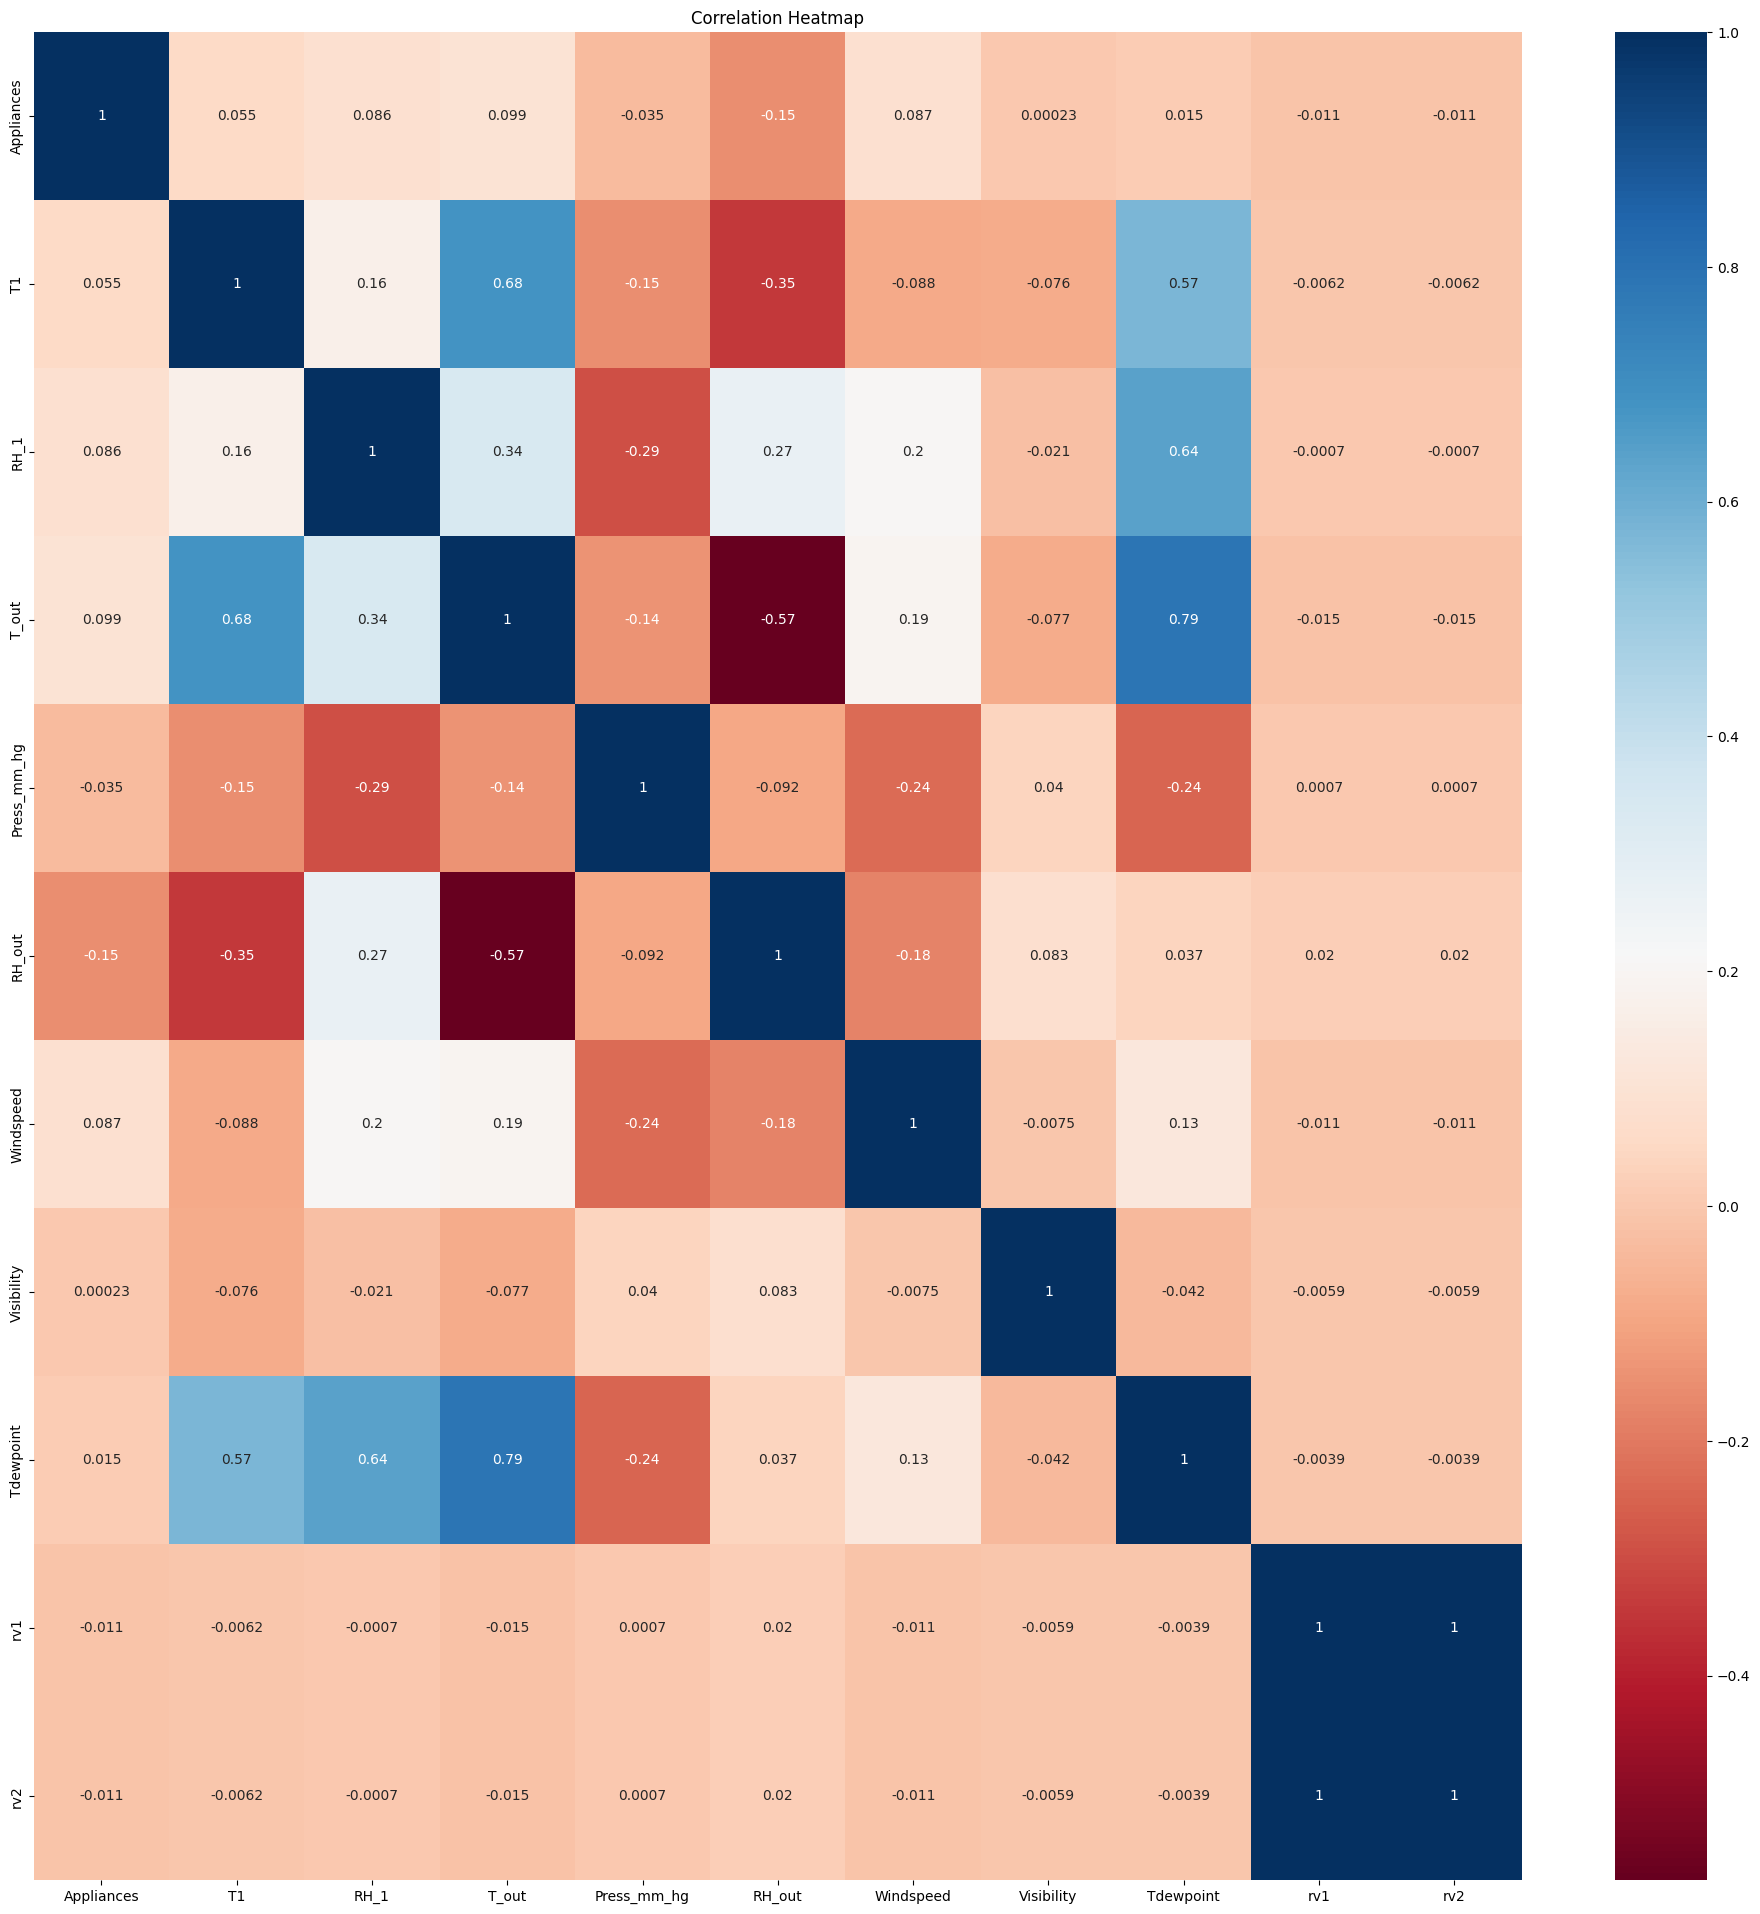

In [ ]:
fig, ax = plt.subplots(figsize=(24,24))
ax = sns.heatmap(df_scaled.corr(), annot=True, cmap='RdBu').set(title='Correlation Heatmap')

Observation:

This heatmap is created after removing the aforementioned columns.

# Scatter Plot

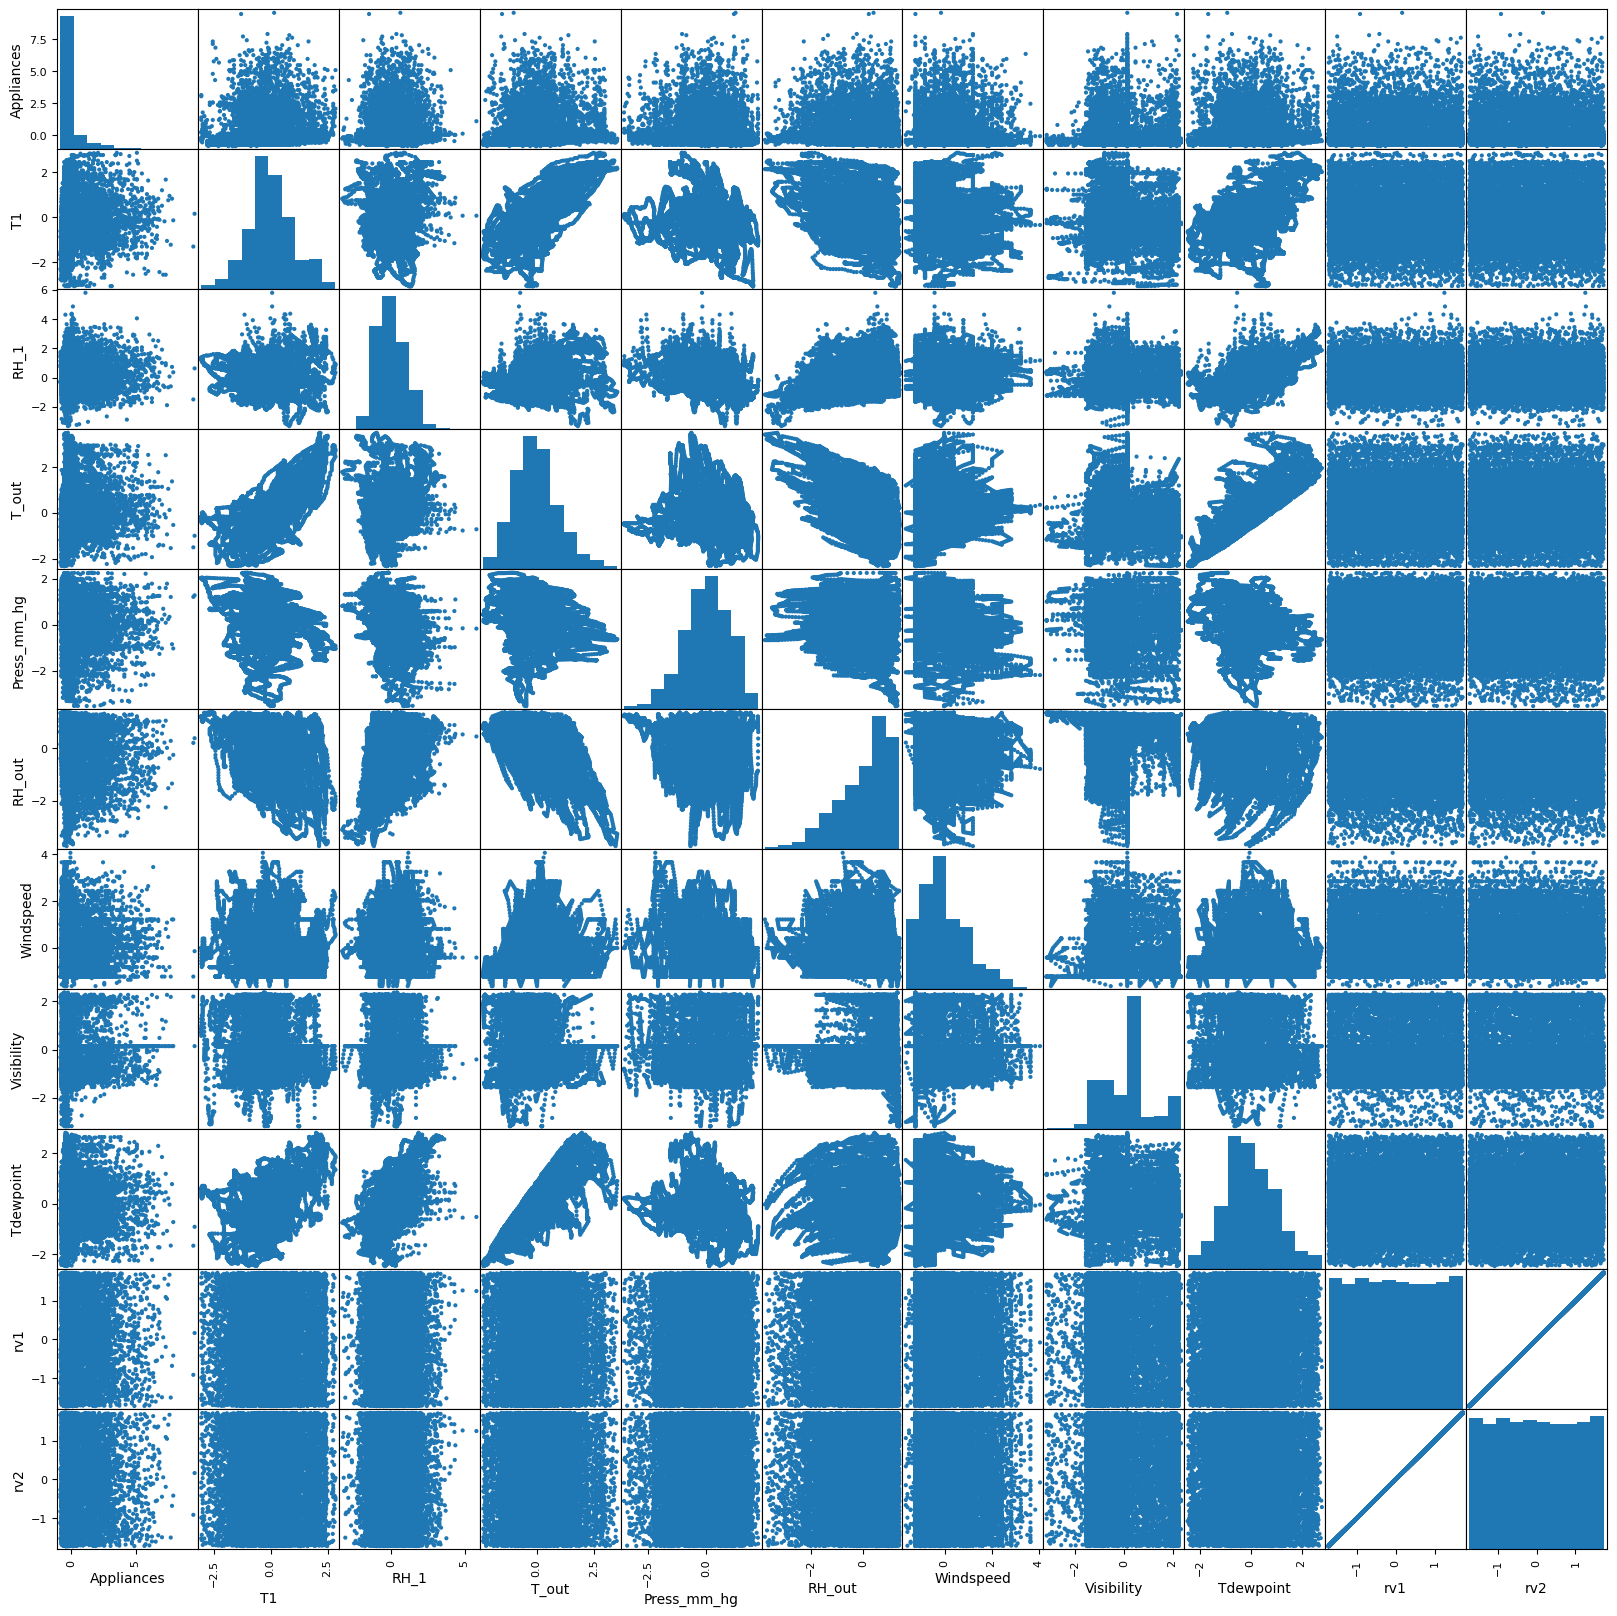

In [ ]:
pd.plotting.scatter_matrix(df_scaled, alpha = 1, figsize = (20, 20))
plt.show()

# Boxplots

Text(0.5, 1.0, 'Distribution of predictors with outliers')

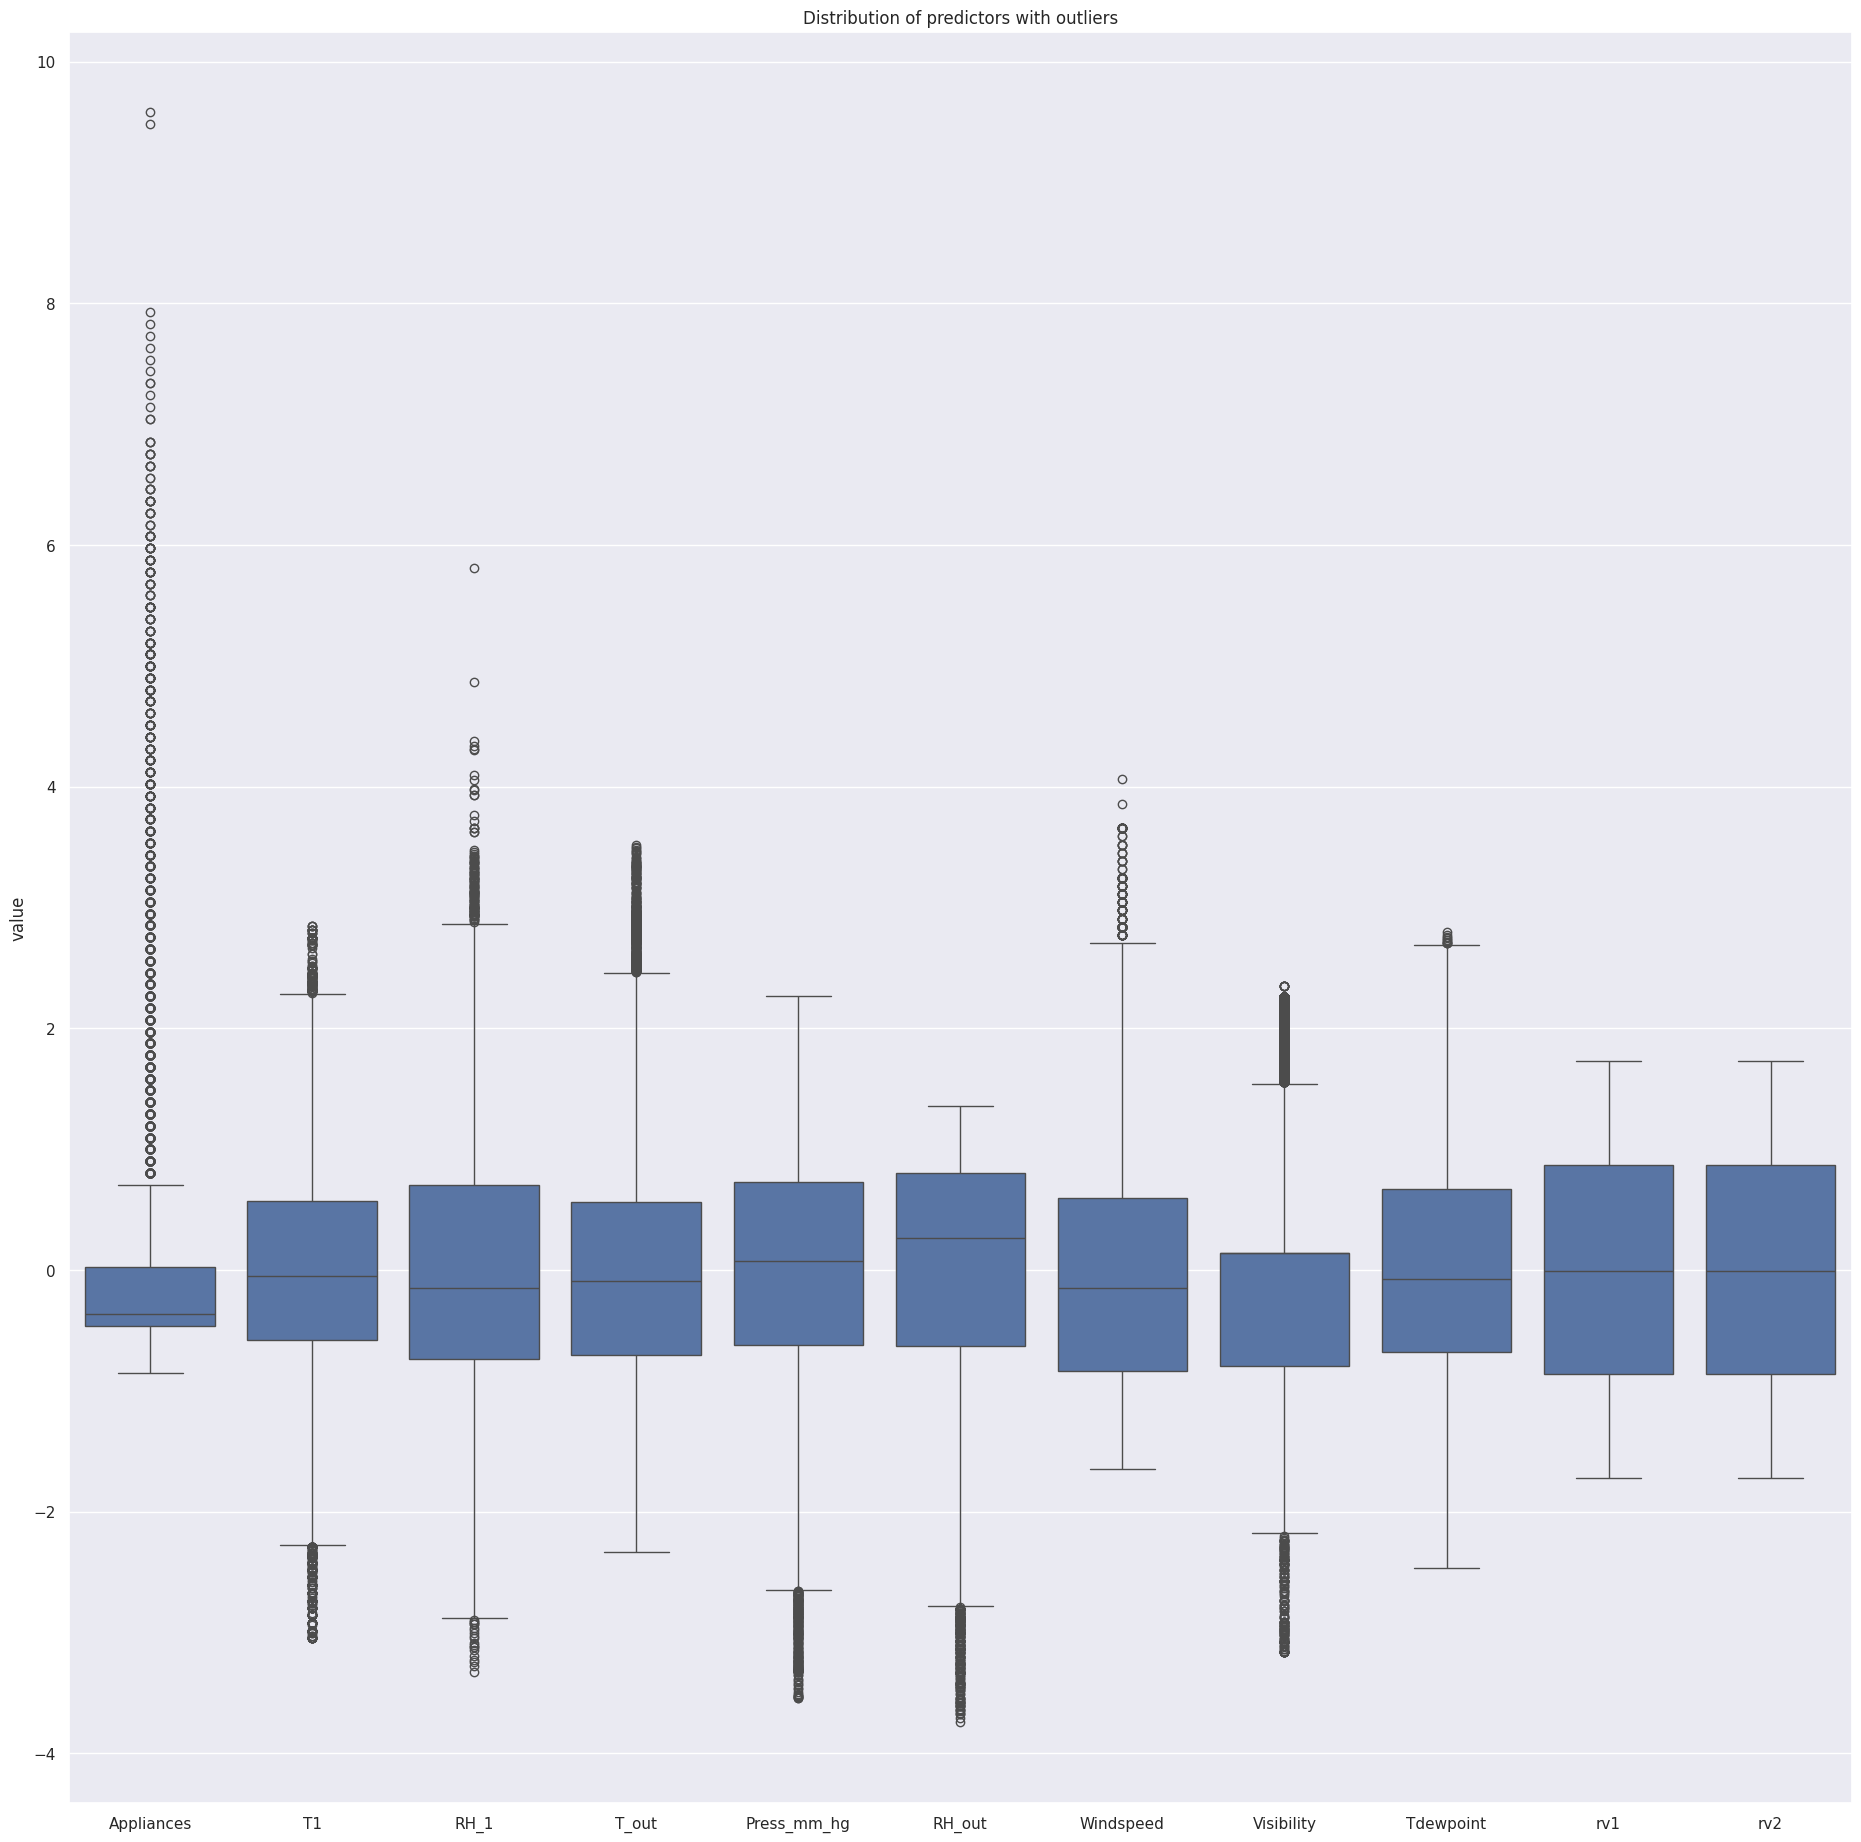

In [ ]:
df_melt=pd.melt(df_scaled)
df_melt
sns.set(rc={'figure.figsize':(23,23)})
sns.boxplot(x='variable', y='value', data=df_melt)
plt.xlabel(None)
plt.title('Distribution of predictors with outliers')

Text(0.5, 1.0, 'Distribution of predictors without outliers')

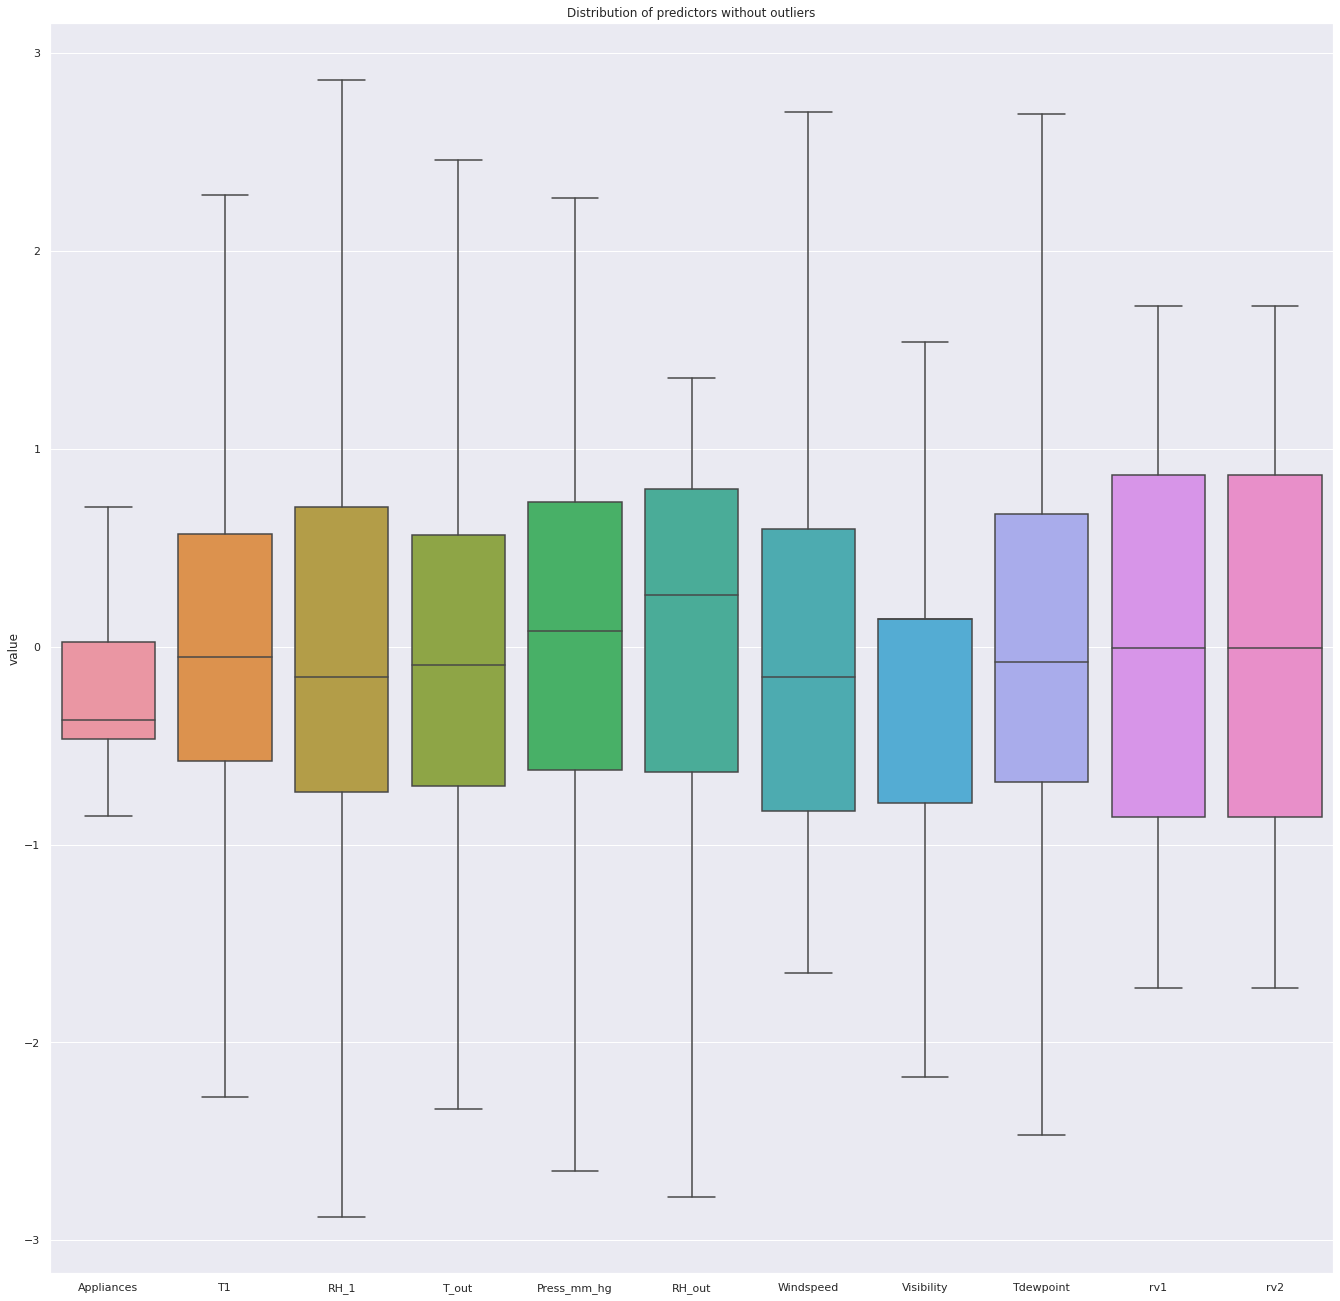

In [ ]:
df_melt=pd.melt(df_scaled)
df_melt
sns.set(rc={'figure.figsize':(23,23)})
sns.boxplot(x='variable', y='value', data=df_melt, showfliers=False)
plt.xlabel(None)
plt.title('Distribution of predictors without outliers')

Training and Testing the variables

In [ ]:
train_X = train[feature_vars.columns]
train_y = train[target_vars.columns]

In [ ]:
test_X = test[feature_vars.columns]
test_y = test[target_vars.columns]

Removing redundant variables

In [ ]:
train_X.drop(["rv1","rv2","T2","T3","T4","T5","T6","T7","T8","T9","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9","Visibility"],axis=1 , inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
test_X.drop(["rv1","rv2","T2","T3","T4","T5","T6","T7","T8","T9","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9","Visibility"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
X.drop(["date","Appliances","lights","rv1","rv2","T2","T3","T4","T5","T6","T7","T8","T9","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9","Visibility"], axis=1, inplace=True)

In [ ]:
X.shape

(19735, 7)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train = train[list(train_X.columns.values) + col_target ]
test = test[list(test_X.columns.values) + col_target ]
sc_train = pd.DataFrame(columns=train.columns , index=train.index)
sc_train[sc_train.columns] = sc.fit_transform(train)
sc_test= pd.DataFrame(columns=test.columns , index=test.index)
sc_test[sc_test.columns] = sc.fit_transform(test)

In [ ]:
sc_train.head()

,T1,RH_1,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Appliances
9544,0.569827,-1.398755,-0.978251,-0.803979,0.529878,1.167725,-1.112160,-0.270443
19366,1.254979,0.004687,-0.217827,0.365687,0.931169,0.226014,-1.248270,-0.464759
10816,0.320681,1.388043,1.120770,0.803317,-0.896934,-0.733721,0.929492,0.021032
15457,-0.246127,-1.125096,-1.339609,-1.006881,0.975757,-0.046587,-0.839939,-0.561918
2956,-0.246127,1.789743,0.630579,1.400086,0.864287,0.419763,1.065602,-0.464759


In [ ]:
sc_test.head()

,T1,RH_1,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Appliances
6314,-0.678526,-0.352449,-0.232839,-1.157146,-1.318014,0.377392,-0.809142,-0.367942
12257,0.814344,0.671740,0.865496,0.485626,-0.967649,-0.401660,0.004891,3.087003
6271,-0.850621,-0.182731,-1.611203,-1.275901,1.191050,0.616061,-0.876978,-0.664080
18179,0.938750,-0.419664,0.591690,0.568755,-0.323430,0.701622,-1.216158,-0.565367
9661,0.005706,-0.797748,-0.307513,-0.001268,0.524227,0.917775,0.004891,0.224334


Removing Appliances column

In [ ]:
train_X =  sc_train.drop(['Appliances'] , axis=1)
train_y = sc_train['Appliances']
test_X =  sc_test.drop(['Appliances'] , axis=1)
test_y = sc_test['Appliances']

In [ ]:
train_X.head()

,T1,RH_1,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed
9544,0.569827,-1.398755,-0.978251,-0.803979,0.529878,1.167725,-1.112160
19366,1.254979,0.004687,-0.217827,0.365687,0.931169,0.226014,-1.248270
10816,0.320681,1.388043,1.120770,0.803317,-0.896934,-0.733721,0.929492
15457,-0.246127,-1.125096,-1.339609,-1.006881,0.975757,-0.046587,-0.839939
2956,-0.246127,1.789743,0.630579,1.400086,0.864287,0.419763,1.065602


In [ ]:
train_y.head()

9544    -0.270443
19366   -0.464759
10816    0.021032
15457   -0.561918
2956    -0.464759
Name: Appliances, dtype: float64

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

In [ ]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [ ]:
from sklearn.model_selection import cross_val_score

model1= Lasso()

cv_results1 = cross_val_score(model1, train_X, train_y, cv=3)

cv_results1

array([-1.05118534e-04, -1.22150458e-04, -1.03156691e-07])

In [ ]:
from sklearn.model_selection import cross_val_score

model2= Ridge()

cv_results2 = cross_val_score(model2, train_X, train_y, cv=3)

cv_results2

array([0.04966157, 0.05787908, 0.04818254])

In [ ]:
from sklearn.model_selection import cross_val_score

model3= neighbors.KNeighborsRegressor()

cv_results3 = cross_val_score(model3, train_X, train_y, cv=3)

cv_results3

array([0.36554319, 0.32225615, 0.3549359 ])

In [ ]:
from sklearn.model_selection import cross_val_score

model4= SVR(kernel='rbf')

cv_results4 = cross_val_score(model4, train_X, train_y, cv=3)

cv_results4

array([0.04050319, 0.06071757, 0.04895603])

In [ ]:
from sklearn.model_selection import cross_val_score

model5= RandomForestRegressor()

cv_results5 = cross_val_score(model5, train_X, train_y, cv=3)

cv_results5

array([0.42674493, 0.42845637, 0.38615641])

In [ ]:
from sklearn.model_selection import cross_val_score

model6= GradientBoostingRegressor()

cv_results6 = cross_val_score(model6, train_X, train_y, cv=3)

cv_results6

array([0.14613673, 0.15107919, 0.1343686 ])

In [ ]:
from sklearn.model_selection import cross_val_score

model7= xgb.XGBRegressor()

cv_results7 = cross_val_score(model7, train_X, train_y, cv=3)

cv_results7

[05:17:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:17:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:17:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.14728989, 0.144796  , 0.13633496])

In [ ]:
from sklearn.model_selection import cross_val_score

model8= MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)

cv_results8 = cross_val_score(model8, train_X, train_y, cv=3)

cv_results8

array([0.15202898, 0.13353259, 0.15262033])

We choose Random Forest Regressor as it has the best accuracy values amongst the models.

Running the models

In [ ]:
rf = RandomForestRegressor()
rf.fit(train_X, train_y)
rf.score(test_X,test_y)

0.4782193451475696

In [ ]:
importances = list(rf.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]
feature_importances

[('T1', 0.13),
 ('RH_1', 0.17),
 ('T_out', 0.13),
 ('Press_mm_hg', 0.15),
 ('RH_out', 0.13),
 ('Windspeed', 0.19),
 ('Tdewpoint', 0.1)]

Removing 'Tdewpoint'

In [ ]:
X_reduced = X.drop(labels=['Tdewpoint'], axis=1)
X_reduced

,T1,RH_1,T_out,Press_mm_hg,RH_out,Windspeed
0,19.890000,47.596667,6.600000,733.5,92.000000,7.000000
1,19.890000,46.693333,6.483333,733.6,92.000000,6.666667
2,19.890000,46.300000,6.366667,733.7,92.000000,6.333333
3,19.890000,46.066667,6.250000,733.8,92.000000,6.000000
4,19.890000,46.333333,6.133333,733.9,92.000000,5.666667
...,...,...,...,...,...,...
19730,25.566667,46.560000,22.733333,755.2,55.666667,3.333333
19731,25.500000,46.500000,22.600000,755.2,56.000000,3.500000
19732,25.500000,46.596667,22.466667,755.2,56.333333,3.666667
19733,25.500000,46.990000,22.333333,755.2,56.666667,3.833333


In [ ]:
y = df['Appliances']
y.shape

(19735,)

In [ ]:
X_red_train, X_red_test, y_red_train , y_red_test = train_test_split(X_reduced, y, test_size=0.2, random_state=1)

In [ ]:
rf.fit(X_red_train, y_red_train)
rf.score(X_red_test, y_red_test)


0.5336420592742179

The accuracy is significanty increasing after removing 'Tdewpoint'.

PCA

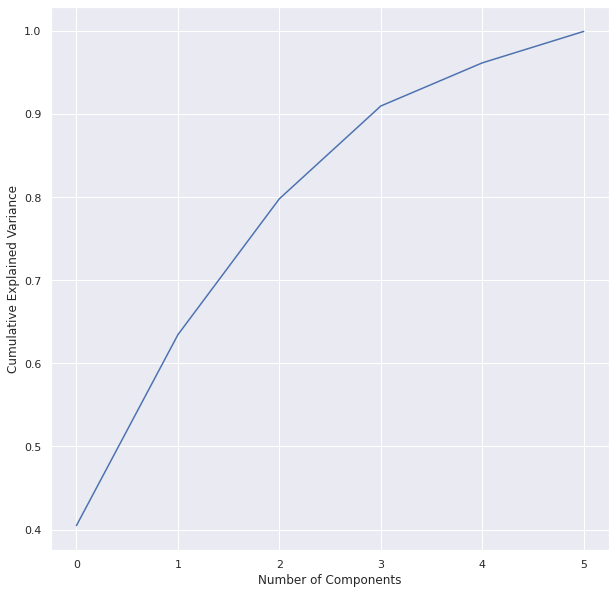

None

In [ ]:
from sklearn.decomposition import PCA

pca_test = PCA(n_components=6)
pca_test.fit(train_X)
sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(10,10)})

plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
display(plt.show())

In [ ]:
pca = PCA(n_components=4)
pca.fit(train_X)
X_train_pca = pca.transform(train_X)
X_test_pca = pca.transform(test_X)

In [ ]:
rf.fit(X_train_pca, train_y)
rf.score(X_test_pca,test_y)

0.3479659771329129

The accuracy reduces by a great number. So, we don't remove these columns.

Performance Evaluation and Interpretation

In [ ]:
import time
from math import sqrt
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    curr_model_data["MSE"] = mean_squared_error(test_y,curr_model.predict(test_X))
    curr_model_data["MAE"] = mean_absolute_error(test_y,curr_model.predict(test_X))
    model_data.append(curr_model_data)

[05:18:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
d = pd.DataFrame(model_data)

In [ ]:
print(d.loc[[4]])

            Name  Train_Time  Train_R2_Score  Test_R2_Score  Test_RMSE_Score  \
4  RandomForest     8.690866        0.931711       0.482698         0.719237   

        MSE       MAE  
4  0.517302  0.353608  


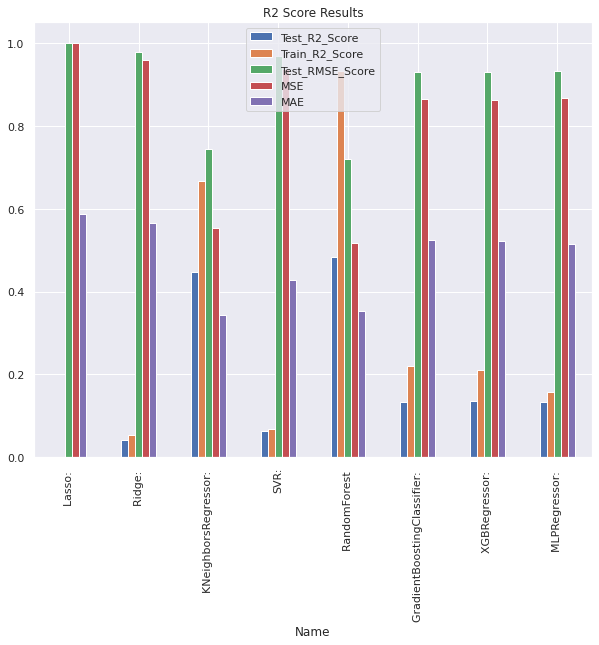

In [ ]:
d.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score','MSE','MAE'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

In [ ]:
regressor = RandomForestRegressor(n_estimators = 6, random_state = 42)
regressor.fit(X_red_train, y_red_train)

RandomForestRegressor(n_estimators=6, random_state=42)

In [ ]:
y_pred = regressor.predict(X_red_test)

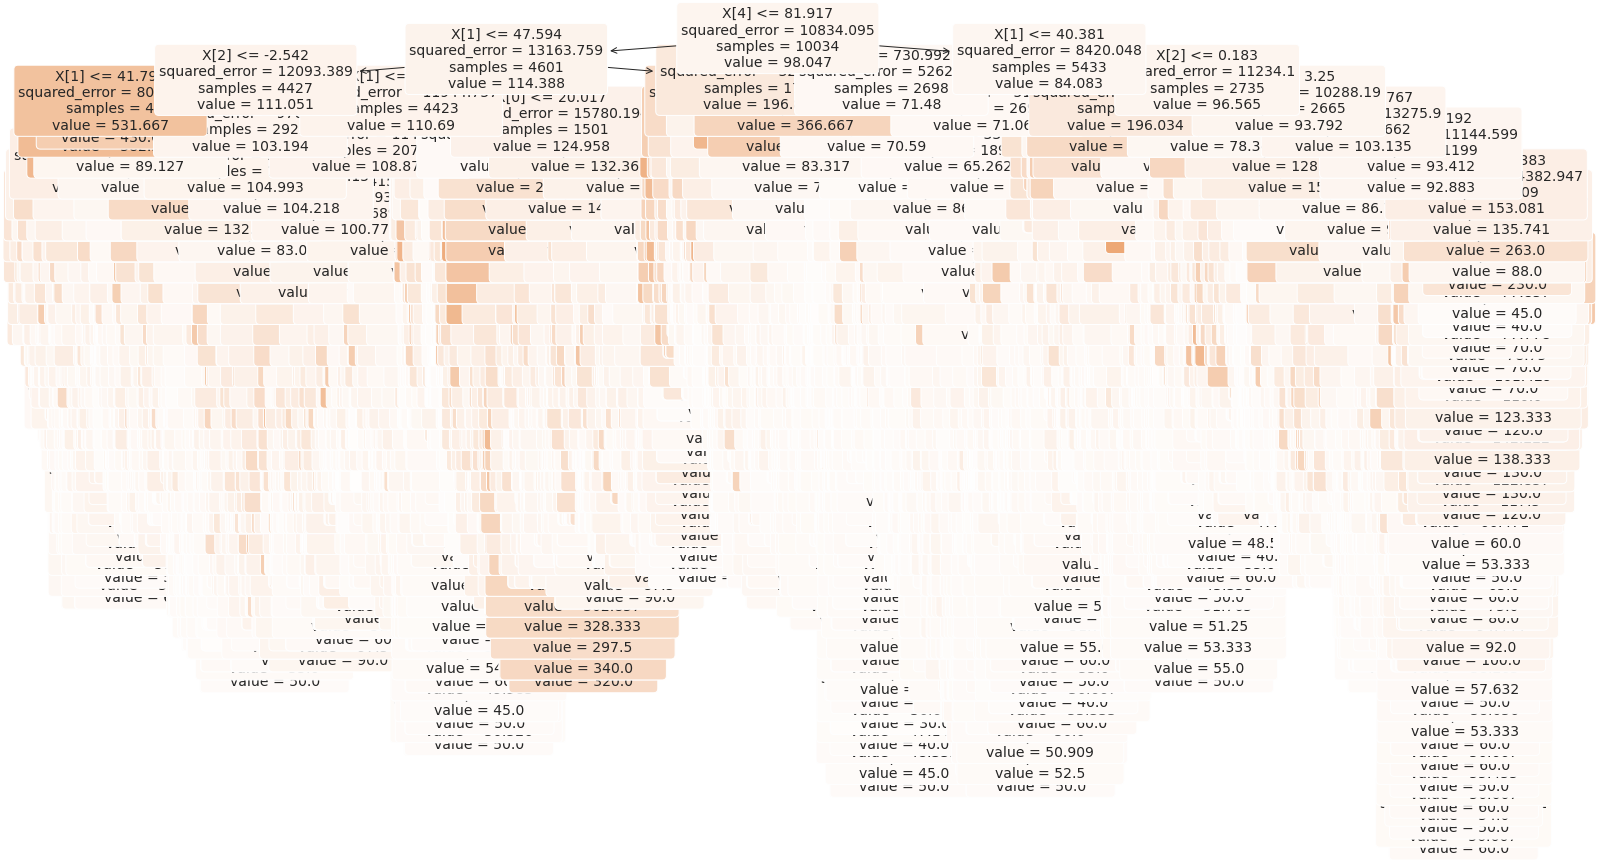

In [ ]:
import pydot
# Pull out one tree from the forest
Tree = regressor.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True,
              rounded=True,
              fontsize=14);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


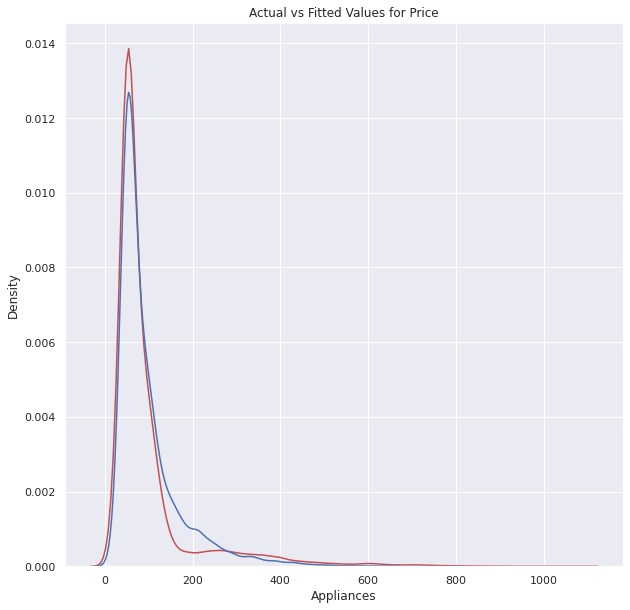

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 10))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

In [ ]:
!pip install dmba

     |████████████████████████████████| 11.8 MB 14.7 MB/s 


Lift Curve

no display found. Using non-interactive Agg backend


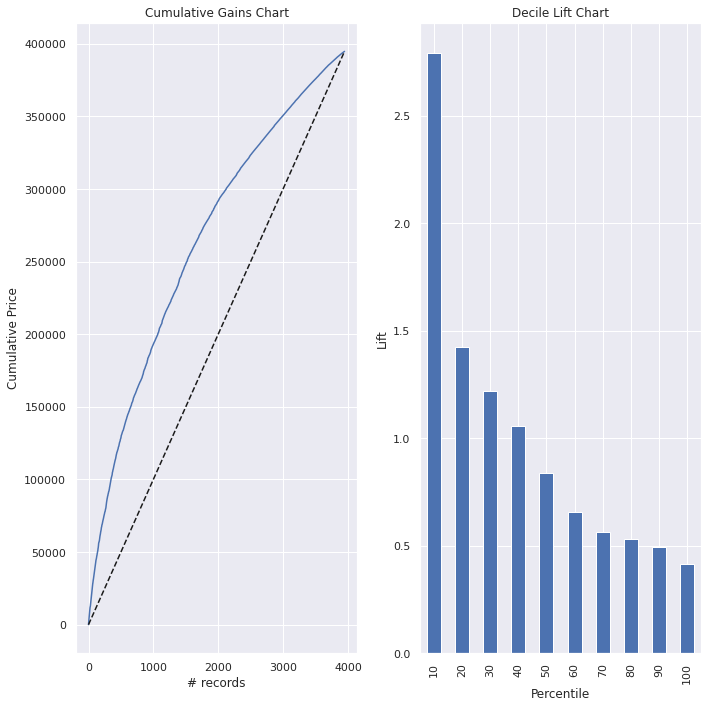

In [ ]:
import dmba
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart

# sort the actual values in descending order of the prediction

df = pd.DataFrame({

'predicted': regressor.predict(X_red_test),

'actual': y_red_test,

})

df = df.sort_values(by=['predicted'], ascending=False)



fig, axes = plt.subplots(nrows=1, ncols=2)

ax = gainsChart(df['actual'], ax=axes[0])

ax.set_ylabel('Cumulative Price')

ax.set_title('Cumulative Gains Chart')



ax = liftChart(df['actual'], ax=axes[1], labelBars=False)

ax.set_ylabel('Lift')



plt.tight_layout()

plt.show()

Correlation between Actual and Predicted Values

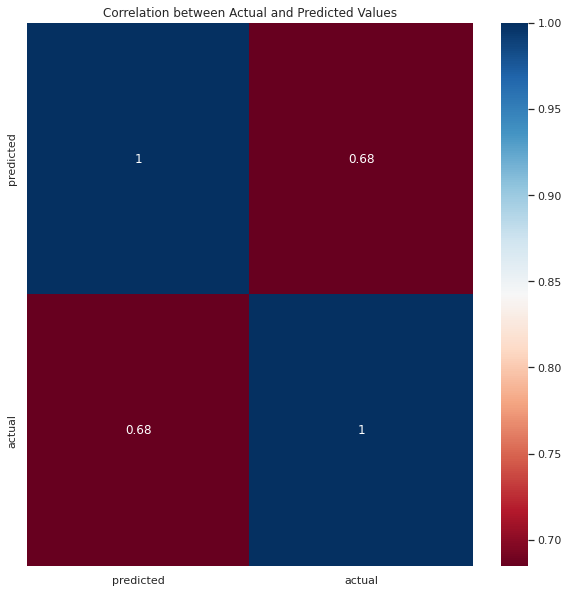

In [ ]:
ax = sns.heatmap(df.corr(), annot=True, cmap='RdBu').set(title='Correlation between Actual and Predicted Values')

0.68 is a strong correlation. So, our prediction model is a good model.